In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.columns.to_list()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
df.shape


(284807, 31)

In [11]:
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
df.isnull().sum().max()


0

In [13]:
df.isna().sum()/len(df)*100


Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [14]:
df["Class"].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
df["Class"].isna().any()


False

In [16]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

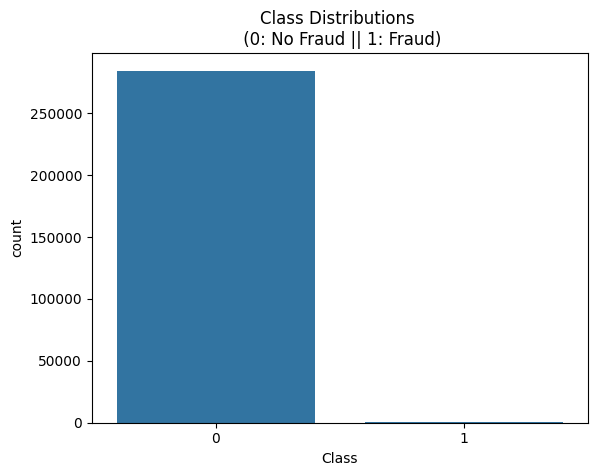

In [17]:
sns.countplot(x=df["Class"])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

In [18]:
# Standardizing the  time and amount columns
# The dataset description shows these are the only colums that were not standardized
rob_scaler = RobustScaler()
rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

array([[-0.99498349],
       [-0.99498349],
       [-0.99497175],
       ...,
       [ 1.03497457],
       [ 1.03497457],
       [ 1.03502156]])

In [19]:
df2 = df[:15000]
df2["Class"].value_counts()

Class
0    14939
1       61
Name: count, dtype: int64

Text(0.5, 1.0, 'ANOVA Score : Part 1')

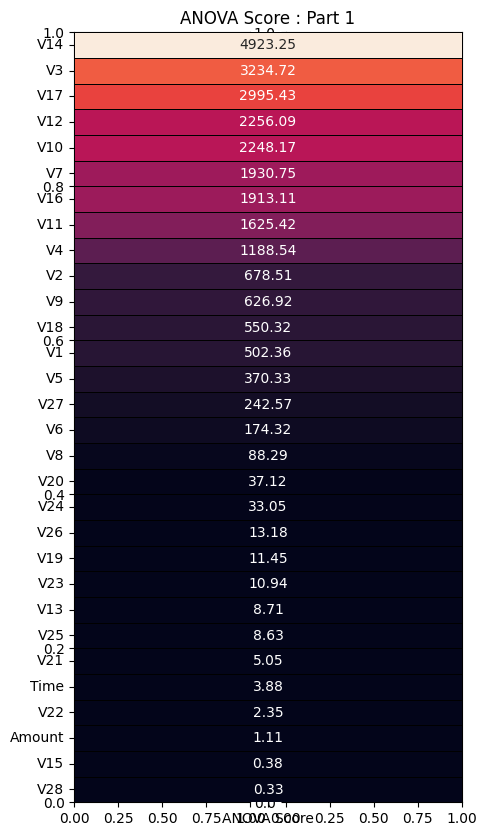

In [20]:
# Using the ANOVA statistical method as a feature selection technique

features = df2.loc[:,:'Amount']
target = df2.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,1,1)
sns.heatmap(featureScores,annot = True,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

In [21]:
# Selecting the features

df3 = df2.copy(deep = True)
df3.drop(columns = list(featureScores.index[20:]),inplace = True)
df3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V20,V24,V26,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.251412,0.066928,-0.189115,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.069083,-0.339846,0.125895,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.524980,-0.689281,-0.139097,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.208038,-1.175575,-0.221929,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.408542,0.141267,0.502292,0.219422,0


In [22]:
f2 = df3.iloc[:,:20].values
t2 = df3.iloc[:,20].values
# splititng the data into training and test datasets 
xtrain, xtest, ytrain, ytest = train_test_split(f2, t2, test_size = 0.30, random_state = 2, stratify=t2)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

# Self Attention layer
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_size, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_size = embed_size
        self.num_heads = num_heads
        assert embed_size % self.num_heads == 0
        self.projection_dim = embed_size // num_heads
        self.query_dense = layers.Dense(embed_size)
        self.key_dense = layers.Dense(embed_size)
        self.value_dense = layers.Dense(embed_size)
        self.combine_heads = layers.Dense(embed_size)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_size))
        output = self.combine_heads(concat_attention)
        return output

# Building the Transformer block

# --- Transformer Block ---
class TransformerBlock(layers.Layer):
    def __init__(self, embed_size, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_size)
        self.ffn = keras.Sequential(
            [
                layers.Dense(ff_dim, activation="relu"),
                layers.Dense(embed_size)
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [24]:
# --- Build Model ---
def build_model(input_shape, embed_size=128, num_heads=8, ff_dim=256):
    inputs = layers.Input(shape=input_shape)
    # Project input to embedding size
    x = layers.Dense(embed_size, activation="relu")(inputs)
    # Transformer block
    x = TransformerBlock(embed_size, num_heads, ff_dim)(x)
    # Pooling and output
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [33]:
# --- Instantiate Model ---
input_shape = (20, 1)
model = build_model(input_shape)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 dense_4 (Dense)             (None, 20, 128)           256       
                                                                 
 transformer_block_1 (Transf  (None, 20, 128)          593920    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129 

In [35]:
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

# --- Compile the model ---
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", AUC(name="auc")]
)

In [37]:
# --- Early stopping to avoid overfitting ---
early_stop = EarlyStopping(
    monitor='val_auc',  # Monitor validation AUC
    patience=10,        # Stop if no improvement for 10 epochs
    mode='max',         # Maximize AUC
    restore_best_weights=True
)

In [40]:
# --- Predict probabilities for AUC ---
def predict_prob(model, X):
    return model.predict(X).flatten()  # Flatten to 1D array

In [42]:
# Initialize the results dataframe before appending
results_mod = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

In [44]:

# --- Train the model ---
history = model.fit(
    xtrain, ytrain,
    epochs=100,
    batch_size=32,
    validation_data=(xtest, ytest),
    callbacks=[early_stop]
)

# --- Predictions ---
y_prob = model.predict(xtest).flatten()            # Probabilities for AUC
threshold = 0.5
ypred = (y_prob >= threshold).astype(int)          # Binary predictions for other metrics

# --- Compute Metrics ---
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
auc = roc_auc_score(ytest, y_prob)               # AUC uses probabilities

# --- Append results to DataFrame ---
results_mod = results_mod._append(
    {
        'Model': 'Trnsfrmr w/8 hds, Adam & Relu',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    },
    ignore_index=True
)

print(results_mod)

Epoch 1/100
329/329 [==============================] - 8s 16ms/step - loss: 0.0217 - accuracy: 0.9955 - auc: 0.8094 - val_loss: 0.0082 - val_accuracy: 0.9964 - val_auc: 0.9983
Epoch 2/100
329/329 [==============================] - 5s 14ms/step - loss: 0.0130 - accuracy: 0.9966 - auc: 0.9132 - val_loss: 0.0074 - val_accuracy: 0.9967 - val_auc: 0.9989
Epoch 3/100
329/329 [==============================] - 5s 14ms/step - loss: 0.0114 - accuracy: 0.9968 - auc: 0.9138 - val_loss: 0.0061 - val_accuracy: 0.9967 - val_auc: 0.9989
Epoch 4/100
329/329 [==============================] - 5s 14ms/step - loss: 0.0118 - accuracy: 0.9968 - auc: 0.9256 - val_loss: 0.0064 - val_accuracy: 0.9967 - val_auc: 0.9989
Epoch 5/100
329/329 [==============================] - 5s 14ms/step - loss: 0.0117 - accuracy: 0.9963 - auc: 0.9139 - val_loss: 0.0085 - val_accuracy: 0.9967 - val_auc: 0.9988
Epoch 6/100
329/329 [==============================] - 5s 14ms/step - loss: 0.0110 - accuracy: 0.9968 - auc: 0.9262 - va

C:\Users\hnwme\AppData\Local\Temp\ipykernel_11920\1131949088.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_mod = results_mod._append(


In [45]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [52]:
model.save("Transformer_model")

INFO:tensorflow:Assets written to: Transformer_model\assets


INFO:tensorflow:Assets written to: Transformer_model\assets


In [56]:
# Predict probabilities and classes
y_pred_prob = model.predict(xtest)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy :", accuracy_score(ytest, y_pred))
print("Precision:", precision_score(ytest, y_pred))
print("Recall   :", recall_score(ytest, y_pred))
print("F1 Score :", f1_score(ytest, y_pred))
print("AUC      :", roc_auc_score(ytest, y_pred_prob))


141/141 [==============================] - 1s 4ms/step
Accuracy : 0.9975555555555555
Precision: 0.64
Recall   : 0.8888888888888888
F1 Score : 0.7441860465116279
AUC      : 0.9996033516783183


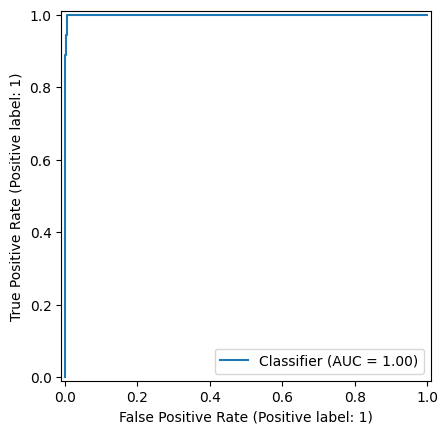

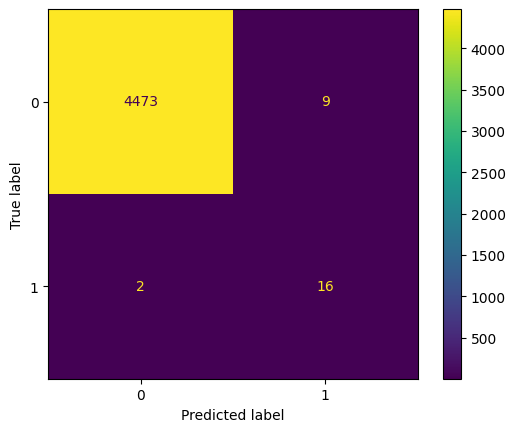

In [60]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(ytest, y_pred_prob)

ConfusionMatrixDisplay.from_predictions(ytest, y_pred)
